# Algorytmy teorioliczbowe i RSA

### Zadanie nr 1

Zaimplementuj funkcję, która zwróci listę czynników pierwszych zadanej liczby naturalnej n. Zrób to rekurencyjnie, sprawdzając podzielność liczby przez kolejne liczby naturalne (aż do ⌊
√n⌋) – rekurencja pojawia się, gdy liczba jest podzielna – wtedy uruchamiamy algorytm na jej dzielnikach.


In [1]:
import random
import timeit
import matplotlib.pyplot as plt

In [2]:
def czynniki_pierwsze(n_i):

    czynniki_l = [] # Lista czynników
    i = 2 # Sprawdzanie zaczynamy od dwójki, jest to najmniejszy czynnik pierwszy

    while i**2 <= n_i: # i**2 <= n jest równoznaczne z i <= sqrt(n)
        if n_i % i != 0: # jeśli n nie jest podzielne przez czynnik, szukamy dalej
            i += 1
        else:
            czynniki_l.append(i)
            czynniki_l.extend(czynniki_pierwsze(n_i//i)) # Wywołujemy funkcję z n podzielonym przez znaleziony czynnik
            return czynniki_l

    # Poniższy kod wykona się jeśli n jest równe 1, 2 bądź 3

    if n_i != 1:
        czynniki_l.append(n_i)
    return czynniki_l

In [3]:
n = int(input(f"Podaj liczbę naturalną, której chcesz otrzymać czynniki pierwsze: "))

print(czynniki_pierwsze(n))

Podaj liczbę naturalną, której chcesz otrzymać czynniki pierwsze: 12
[2, 2, 3]


### Zadanie nr 2
Zaimplementuj sito Eratostenesa, aby wyznaczyć zbiór liczb pierwszych nie większych od zadanego p.

In [4]:
def sito_eratostenesa(p):
    czyjest = [1 for _ in range(2, p + 1)]
    odpowiednik = [i for i in range(2, p+1)]

    i=0
    while odpowiednik[i]**2 <= p: #dla n := 2 do ⌊sqrt(p)⌋
        if czyjest[i] == 1: # jeśli xn = 1, to
            l=0
            while l <= p//odpowiednik[i]: # dla j := 2 do ⌊p/n⌋
                for j in range(i+1, p-1):
                    if odpowiednik[j] % odpowiednik[i] == 0:
                        czyjest[j] = 0 # xn·j := 0
                l += 1
        i += 1

    # tworzymy listę wyjściową

    wynik = []
    for i in range(len(czyjest)-1):
        if czyjest[i] == 1:
            wynik.append(odpowiednik[i])

    return wynik

In [5]:
p = int(input(f"Podaj liczbę naturalną, aby wyznaczyć zbiór liczb pierwszych nie większych od niej: "))

print(sito_eratostenesa(p))

Podaj liczbę naturalną, aby wyznaczyć zbiór liczb pierwszych nie większych od niej: 12
[2, 3, 5, 7, 11]


### Zadanie nr 3

##### 3.1 Wyszukiwanie
Zaimplementuj funkcję szukającą największego wspólnego dzielnika dwóch liczb. Zrób to na dwa sposoby.
• Z wykorzystaniem rozkładu na czynniki pierwsze RNWD(a, b).
• Z wykorzystaniem algorytmu Euklidesa ENWD(a, b).


##### 3.2 Testy wydajności
Przygotuj procedurę testową do sprawdzenia czasu działania obu algorytmów.
Uruchamiaj RNWD(n, q) i ENWD(n, q) dla zadanej liczby n i dla kolejnych liczb naturalnych q do pewnego
zadanego m. Czasy działania obu algorytmów wyświetl na jednym wykresie.

In [6]:
def nwd_euklides(a, b):
    while b != 0:
        a, b = b, a % b
    return a

In [7]:
def nwd_rozklad(a, b):
    czynniki_a = czynniki_pierwsze(a)
    czynniki_b = czynniki_pierwsze(b)
    i = j = 0
    nwd = 1
    while i < len(czynniki_a) and j < len(czynniki_b):
        if czynniki_a[i] == czynniki_b[j]:
            nwd *= czynniki_a[i]
            i += 1
            j += 1
        elif czynniki_a[i] < czynniki_b[j]:
            i += 1
        else:
            j += 1
    return nwd

In [8]:
print(nwd_euklides(24, 36))
print(nwd_rozklad(24, 36))

12
12


In [9]:
test_enwd = '''

def nwd_euklides(a, b):
    while b != 0:
        a, b = b, a % b
    return a

nwd_euklides(24, 36)

'''

In [10]:
test_rnwd = '''

def czynniki_pierwsze(n_i):

    czynniki_l = [] # Lista czynników
    i = 2 # Sprawdzanie zaczynamy od dwójki, jest to najmniejszy czynnik pierwszy

    while i**2 <= n_i: # i**2 <= n jest równoznaczne z i <= sqrt(n)
        if n_i % i != 0: # jeśli n nie jest podzielne przez czynnik, szukamy dalej
            i += 1
        else:
            czynniki_l.append(i)
            czynniki_l.extend(czynniki_pierwsze(n_i//i)) # Wywołujemy funkcję z n podzielonym przez znaleziony czynnik
            return czynniki_l

    # Poniższy kod wykona się jeśli n jest równe 1, 2 bądź 3

    if n_i != 1:
        czynniki_l.append(n_i)
    return czynniki_l

def nwd_rozklad(a, b):
    czynniki_a = czynniki_pierwsze(a)
    czynniki_b = czynniki_pierwsze(b)
    i = j = 0
    nwd = 1
    while i < len(czynniki_a) and j < len(czynniki_b):
        if czynniki_a[i] == czynniki_b[j]:
            nwd *= czynniki_a[i]
            i += 1
            j += 1
        elif czynniki_a[i] < czynniki_b[j]:
            i += 1
        else:
            j += 1
    return nwd


nwd_rozklad(24, 36)

'''

Podaj liczbę dla której chcesz znaleźć nwd12
Podaj górną granica przedziału liczb naturalnych12


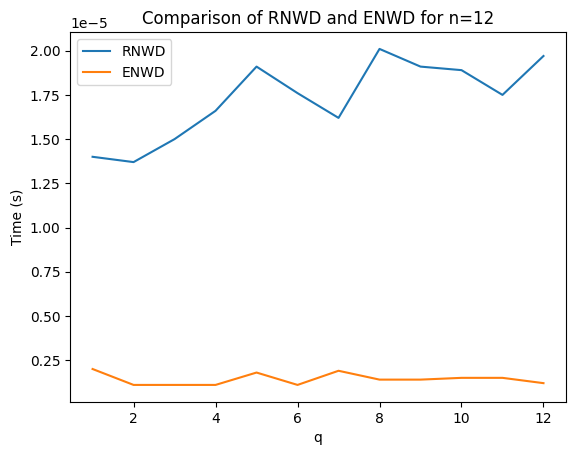

In [11]:
n = int(input("Podaj liczbę dla której chcesz znaleźć nwd"))
m = int(input("Podaj górną granica przedziału liczb naturalnych"))

def test_func(n, m):
    list_endw_times = []
    list_rndw_times = []

    for q in range(1, m+1):
        list_rndw_times.append(timeit.timeit(f'nwd_rozklad({n}, {q})', number=5, globals=globals()))
        list_endw_times.append(timeit.timeit(f'nwd_euklides({n}, {q})', number=5, globals=globals()))

    plt.plot(range(1, m+1), list_rndw_times, label='RNWD')
    plt.plot(range(1, m+1), list_endw_times, label='ENWD')
    plt.title(f'Comparison of RNWD and ENWD for n={n}')
    plt.xlabel('q')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.show()

test_func(n, m)

### Zadanie nr 4
Zaimplementuj dwa algorytmy testowania pierwszości liczb
• test Fermata,
• test Millera-Rabina.
Wykorzystaj szybki algorytm potęgowania modulo.

In [12]:
# Algorytm potęgowania modulo

def pow_mod(a, b, n):
    wynik = 1
    while b > 0:
        if b & 1: # sprawdzenie czy liczba jest nieparzysta
            wynik = (wynik * a) % n
        a = (a * a) % n
        b >>= 1 # równoznacznośc z podzieleniem przez 2
    return wynik

In [13]:
tru = "Liczba z dużym prawdopodobieństwem jest pierwsza"
fols = "Liczba nie jest pierwsza"

In [14]:
def fermat_test(p, k=100):

    if p == 2:
        return tru

    if not p % 2:
        return fols

    for i in range(k):

        a = random.randint(1, p-1)

        if pow_mod(a, p-1, p) != 1:
            return fols

    return tru

In [15]:
n = int(input("Podaj liczbę do sprawdzenia"))
print(fermat_test(n))

Podaj liczbę do sprawdzenia12
Liczba nie jest pierwsza


In [16]:
def miller_test(n, k=100):
    if n == 2 or n == 3:
        return tru

    if not n & 1:
        return fols

    d = n - 1
    s = 0

    while d % 2 == 0:
        d //= 2
        s += 1


    for i in range(k):
        a = random.randint(2, n-2)
        x = pow_mod(a, d, n)
        if x == 1 or x == n-1:
            continue
        for j in range(s-1):
            x = pow_mod(x, 2, n)
            if x == n-1:
                break
        else:
            return fols

    return tru

In [17]:
n = int(input("Podaj liczbę do sprawdzenia"))
print(miller_test(n))

Podaj liczbę do sprawdzenia12
Liczba nie jest pierwsza


### Zadanie nr 5
Zaimplementuj algorytm RSA. Zaszyfruj nim (i odszyfruj) przykładowe teksty. W razie potrzeby, automatycznie dziel tekst na mniejsze, osobno szyfrowane części.

In [22]:
# funkcja sprawdzająca, czy liczba jest pierwsza, korzystając z funkcji którą już zaimplementowałem
def czy_pierwsza(n):
    if len(czynniki_pierwsze(n)) == 1:
        return True
    else:
        return False

# Rozszerzony algorytm Euklidesa
def rozszerzony_euklides(a, b):
    if a == 0:
        return b, 0, 1
    else:
        g, y, x = rozszerzony_euklides(b % a, a)
        return g, x - (b // a) * y, y


# Funkcja do obliczania odwrotności modulo
def odwrotnosc_modulo(a, m):
    # Wykorzystujemy rozszerzony algorytm Euklidesa
    g, x, y = rozszerzony_euklides(a, m)
    if g != 1:
        raise Exception('Brak odwrotności modulo')
    else:
        return x % m

# Funkcja do generowania kluczy RSA
def generuj_klucz(p, q):
    n = p * q # jest to iloczyn dwóch dużych liczb pierwszych p i q, czyli n = p * q. W RSA nazywa się modułem, który jest wykorzystywany do szyfrowania i deszyfrowania wiadomości.
    f_eulera = (p-1) * (q-1)
    # Wyznaczamy e - względnie pierwsze z phi
    e = random.randrange(1, f_eulera)
    g = nwd_euklides(e, f_eulera)
    while g != 1:
        e = random.randrange(1, f_eulera)
        g = nwd_euklides(e, f_eulera)
    # Wyznaczamy d - odwrotność modulo e
    d = odwrotnosc_modulo(e, f_eulera)
    return (e, n), (d, n)


# Funkcja do szyfrowania RSA
def szyfruj(klucz_publiczny, wiadomosc):
    # Odczytujemy klucz publiczny
    e, n = klucz_publiczny
    # Zamieniamy każdy znak na odpowiadającą mu liczbę
    szyfr = [pow(ord(char),e,n) for char in wiadomosc]
    return szyfr

# Funkcja do deszyfrowania RSA
def odszyfruj(pk, ciphertext):
    # Odczytujemy klucz prywatny
    d, n = pk
    # Zamieniamy każdą liczbę na odpowiadający jej znak
    plaintext = [chr(pow(char,d,n)) for char in ciphertext]
    return ''.join(plaintext)
# Generujemy klucz RSA
p = 41
q = 97
publiczny, prywatny = generuj_klucz(p, q)
print("Klucz publiczny:", publiczny)
print("Klucz prywatny:", prywatny )
wiadomosc = input("Podaj wiadomośc do zaszyfrowania")
zaszyfrowana_wiadomosc = szyfruj(publiczny, wiadomosc)
print("Zaszyfrowana wiadomość:", zaszyfrowana_wiadomosc)
# Deszyfrujemy wiadomość
odszyfrowana_wiadomosc = odszyfruj(prywatny, zaszyfrowana_wiadomosc)
print("Odszyfrowana wiadomość:", odszyfrowana_wiadomosc)

Odszyfrowana wiadomość: 12
